In [1]:
import numpy as np
import math


m = [0.99, 0.00, 0.00, 0.00, 0.99,
     0.99, 0.99, 0.00, 0.99, 0.99,
     0.99, 0.00, 0.99, 0.00, 0.99,
     0.99, 0.00, 0.00, 0.00, 0.99,
     0.99, 0.00, 0.00, 0.00, 0.99]

x = [0.99, 0.00, 0.00, 0.00, 0.99, 
     0.00, 0.99, 0.00, 0.99, 0.00, 
     0.00, 0.00, 0.99, 0.00, 0.00, 
     0.00, 0.99, 0.00, 0.99, 0.00, 
     0.99, 0.00, 0.00, 0.00, 0.99]

y = [0.99, 0.00, 0.00, 0.00, 0.99,
     0.00, 0.99, 0.00, 0.99, 0.00,
     0.00, 0.00, 0.99, 0.00, 0.00,
     0.00, 0.00, 0.99, 0.00, 0.00,
     0.00, 0.00, 0.99, 0.00, 0.00]



In [2]:
def list_matrix(lis):
    tem_lst = []
    final_lst = []
    num = 0
    for i in lis:
        tem_lst.append(i)
        num +=1
        if num == 5:
            final_lst.append(tem_lst)
            tem_lst = []
            num = 0
    return final_lst


        

In [3]:
def matrix_list(matrix):
    final_lst = []
    for item in matrix:
        final_lst.extend(list(item))
    return final_lst

In [4]:
blur = [[0.9,0.1,0,0,0],
         [0.1,0.8,0.1,0,0],
         [0,0.1,0.8,0.1,0],
         [0,0,0.1,0.8,0.1],
         [0,0,0,0.1,0.9]]

brighten = [[0.8,0,0,0,0],
            [0,0.8,0,0,0],
            [0,0,0.8,0,0],
            [0,0,0,0.8,0],
            [0,0,0,0,0.8]]

noise = [[0.9,0,0.05,0,0],
        [0.05,0.9,0,0,0],
        [0.1,0,0.9,0,0.05],
        [0,0.05,0.1,0.9,0],
        [0,0,0.05,0.05,0.90]]

noise_and_blur = [[0.9,0.12,0,0,0.1],
                 [0.2,0.7,0.2,0,0.05],
                 [0,0.08,0.8,0.2,0],
                 [0,0,0.1,0.8,0.2],
                 [0.15,0.07,0,0.2,0.78]]

m = list_matrix(m)
x = list_matrix(x)
y = list_matrix(y)

m_array = np.array(m)
x_array = np.array(x)
y_array = np.array(y)


blur_array = np.array(blur)
brighten_array = np.array(brighten)
noise_array = np.array(noise)
noise_and_blur_array = np.array(noise_and_blur)

print(m_array)



vari_1_m = np.dot(m_array, blur_array)
vari_2_m = np.dot(vari_1_m, brighten_array)
vari_3_m = np.dot(vari_2_m, noise_array)
vari_4_m = np.dot(vari_3_m, noise_and_blur_array)

vari_1_x = np.dot(x_array, blur_array)
vari_2_x = np.dot(vari_1_x, brighten_array)
vari_3_x = np.dot(vari_2_x, noise_array)
vari_4_x = np.dot(vari_3_x, noise_and_blur_array)

vari_1_y = np.dot(y_array, blur_array)
vari_2_y = np.dot(vari_1_y, brighten_array)
vari_3_y = np.dot(vari_2_y, noise_array)
vari_4_y = np.dot(vari_3_y, noise_and_blur_array)




[[0.99 0.   0.   0.   0.99]
 [0.99 0.99 0.   0.99 0.99]
 [0.99 0.   0.99 0.   0.99]
 [0.99 0.   0.   0.   0.99]
 [0.99 0.   0.   0.   0.99]]


In [5]:
print(vari_4_m)

[[0.692208  0.181368  0.0891    0.22968   0.5900796]
 [0.931392  0.6396192 0.437976  0.747648  0.8086716]
 [0.772596  0.2905848 0.573804  0.408672  0.63954  ]
 [0.692208  0.181368  0.0891    0.22968   0.5900796]
 [0.692208  0.181368  0.0891    0.22968   0.5900796]]


In [6]:
vari_1_m = matrix_list(vari_1_m)
vari_2_m = matrix_list(vari_2_m)
vari_3_m = matrix_list(vari_3_m)
vari_4_m = matrix_list(vari_4_m)

vari_1_x = matrix_list(vari_1_x)
vari_2_x = matrix_list(vari_2_x)
vari_3_x = matrix_list(vari_3_x)
vari_4_x = matrix_list(vari_4_x)

vari_1_y = matrix_list(vari_1_y)
vari_2_y = matrix_list(vari_2_y)
vari_3_y = matrix_list(vari_3_y)
vari_4_y = matrix_list(vari_4_y)



In [7]:
variations = [vari_1_m, vari_2_m, vari_3_m, vari_4_m, vari_1_x, vari_2_x, vari_3_x, vari_4_x, vari_1_y, vari_2_y, vari_3_y, vari_4_y]

correlation_matrix = np.zeros((len(variations), len(variations)))

for i in range(len(variations)):
    for j in range(len(variations)):
        correlation_matrix[i, j] = np.dot(variations[i], variations[j])

for row in correlation_matrix:
    print('\t'.join(f'{value:.3f}' for value in row))

10.703	8.562	8.053	8.446	5.861	4.689	4.484	4.820	3.960	3.168	3.232	3.420
8.562	6.850	6.443	6.757	4.689	3.751	3.587	3.856	3.168	2.534	2.585	2.736
8.053	6.443	6.114	6.452	4.451	3.561	3.437	3.717	3.160	2.528	2.580	2.733
8.446	6.757	6.452	7.031	4.718	3.774	3.668	4.079	3.287	2.630	2.702	3.008
5.861	4.689	4.451	4.718	6.488	5.191	4.789	4.554	3.901	3.121	2.974	2.965
4.689	3.751	3.561	3.774	5.191	4.152	3.831	3.643	3.121	2.497	2.379	2.372
4.484	3.587	3.437	3.668	4.789	3.831	3.570	3.437	2.997	2.398	2.303	2.307
4.820	3.856	3.717	4.079	4.554	3.643	3.437	3.540	2.967	2.374	2.315	2.445
3.960	3.168	3.160	3.287	3.901	3.121	2.997	2.967	4.861	3.889	3.575	3.308
3.168	2.534	2.528	2.630	3.121	2.497	2.398	2.374	3.889	3.111	2.860	2.646
3.232	2.585	2.580	2.702	2.974	2.379	2.303	2.315	3.575	2.860	2.661	2.489
3.420	2.736	2.733	3.008	2.965	2.372	2.307	2.445	3.308	2.646	2.489	2.489


In [8]:
m = matrix_list(m)
x = matrix_list(x)
y = matrix_list(y)

In [9]:
NN1 = [m, x, y]
NN2 = [m, x, y]
scores = []  

for variation in variations:
    score = np.matmul(NN1, variation)/(np.linalg.norm(NN1) * np.linalg.norm(variation))
    scores.append(score)
    print(score)

[0.66308879 0.35964138 0.24725345]
[0.66308879 0.35964138 0.24725345]
[0.65692478 0.35834964 0.25991501]
[0.62750049 0.34572901 0.23962029]
[0.46190427 0.54851132 0.31755919]
[0.46190427 0.54851132 0.31755919]
[0.47403942 0.54098095 0.32770213]
[0.50050135 0.49367312 0.31398542]
[0.36687054 0.36687054 0.48360208]
[0.36687054 0.36687054 0.48360208]
[0.40253045 0.37413245 0.47780771]
[0.42258667 0.37206456 0.43695564]


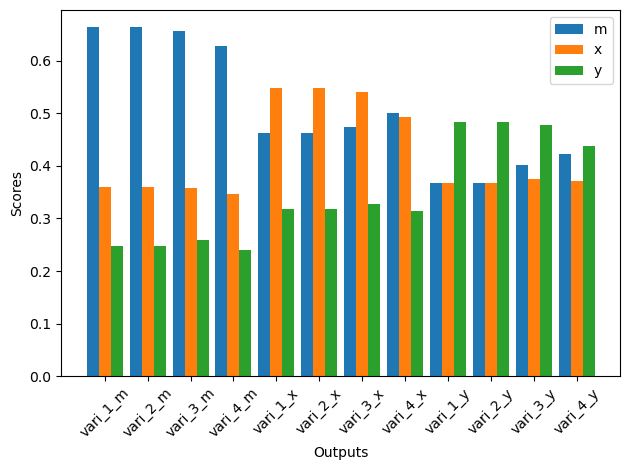

In [10]:
# Create a bar chart
import matplotlib.pyplot as plt

m_x_y = ['m', 'x', 'y']
labels = ['vari_1_m', 'vari_2_m', 'vari_3_m', 'vari_4_m', 'vari_1_x', 'vari_2_x', 'vari_3_x', 'vari_4_x', 'vari_1_y', 'vari_2_y', 'vari_3_y', 'vari_4_y']
scores = np.array(scores).T

x = np.arange(len(labels)) * 1.25   
width = 0.35 

fig, ax = plt.subplots()
for i, score in enumerate(scores):
    ax.bar(x + i * width, score, width, label=m_x_y[i])

ax.set_xlabel('Outputs')
ax.set_ylabel('Scores')
ax.set_xticks(x + width * (len(scores) - 1) / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [11]:
def cal_score(lst):
    print(np.matmul(NN1,lst)/(np.linalg.norm(NN1) * np.linalg.norm(variation)))
    print(np.argmax(np.matmul(NN1,lst)/(np.linalg.norm(NN1) * np.linalg.norm(variation))))
'''   
def cal_NN2_score(lst):
    print(np.matmul(NN2,lst))
    print(np.argmax(np.matmul(NN2,lst))'
'''

"   \ndef cal_NN2_score(lst):\n    print(np.matmul(NN2,lst))\n    print(np.argmax(np.matmul(NN2,lst))'\n"

In [12]:
#the first one is correctly recognized, although there is very little difference between "m" and "x", the rest are all wrong
small_m = [0  ,0  ,0  ,0  ,0,
           0.9,0  ,0  ,0.9,0,
           0.9,0.9,0.9,0.9,0,
           0.9,0  ,0  ,0.9,0,
           0.9,0  ,0  ,0.9,0]

small_x = [0.9,0  ,0.9,0  ,0,
           0  ,0.9,0  ,0  ,0,
           0.9,0  ,0.9,0  ,0,
           0  ,0  ,0  ,0  ,0,
           0  ,0  ,0  ,0  ,0]

small_y = [0.9,0  ,0.9,0  ,0,
           0  ,0.9,0  ,0  ,0,
           0  ,0.9,0  ,0  ,0,
           0  ,0.9,0  ,0  ,0,
           0  ,0  ,0  ,0  ,0]
small_y2 = [0  ,0  ,0.9,0  ,0.9,
            0  ,0  ,0  ,0.9,  0,
            0  ,0  ,0  ,0.9,  0,
            0  ,0  ,0  ,0.9,  0,         
            0  ,0  ,0  ,0  ,  0]

cal_score(small_m)
cal_score(small_x)

cal_score(small_y)
cal_score(small_y2)

[0.63555151 0.42370101 0.2118505 ]
0
[0.42370101 0.31777575 0.31777575]
0
[0.2118505  0.31777575 0.2118505 ]
1
[0.2118505  0.31777575 0.2118505 ]
1


In [13]:
all_zeros = [0, 0, 0, 0, 0,
             0, 0, 0, 0, 0,
             0, 0, 0, 0, 0,
             0, 0, 0, 0, 0,
             0, 0, 0, 0, 0]

all_ones = [1, 1, 1, 1, 1,
            1, 1, 1, 1, 1,
            1, 1, 1, 1, 1,
            1, 1, 1, 1, 1,
            1, 1, 1, 1, 1]

In [14]:
cal_score(all_zeros)
cal_score(all_ones)

[0. 0. 0.]
0
[1.53003141 1.05925251 0.82386307]
0


In [15]:
# changed two pixels
change_m =[0.69, 0.18, 0.08, 0.23, 0.59, 
           0.86, 0.62, 0.32, 0.72, 0.79, 
           0.75, 0.28, 0.55, 0.39, 0.59, 
           0.69, 0.8, 0.08, 0.9, 0.59, 
           0.69, 0.18, 0.08, 0.23, 0.59]
#changed one pixels
change_x = [0.69, 0.18, 0.08, 0.23, 0.59, 
            0.18, 0.44, 0.25, 0.49, 0.2, 
            0.1 , 0.1 , 0.47, 0.16, 0.1, 
            0.18, 0.44, 0.6, 0.49, 0.2, 
            0.69, 0.18, 0.8 , 0.23, 0.59]
#changed five pixels
change_y = [0.69, 0.18, 0.08, 0.23, 0.59, 
           0.18, 0.44, 0.25, 0.49, 0.2, 
           0.6, 0.1, 0.47, 0.16, 0.8, 
           0.9, 0.1, 0.47, 0.16, 0.8, 
           0.9, 0.1, 0.47, 0.16, 0.0]


cal_score(change_m)
cal_score(change_x)
cal_score(change_y)

[1.02629799 0.72382255 0.39192343]
0
[0.57905804 0.5755272  0.48019447]
0
[0.83092475 0.45194774 0.4260549 ]
0


In [16]:
#this input has equal values for all characters
x_y_m = [0.99, 0.00, 0.00, 0.00, 0.99, 
       0.00, 0.99, 0.00, 0.99, 0.00, 
       0.00, 0.00, 0.99, 0.00, 0.00, 
       0.00, 0.00, 0.00, 0.00, 0.00, 
       0.00, 0.00, 0.00, 0.00, 0.00]
cal_score(x_y_m)
# this input has the common items of all three characters, therefor it has same values for all characters.

[0.58258888 0.58258888 0.58258888]
0
